In [3]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using cuda device


In [6]:
words = open("names.txt" , 'r').read().splitlines()

In [7]:
print(f"Number of Words : {len(words)}")

Number of Words : 32033


In [8]:
min(len(w) for w in words)

2

In [9]:
max(len(w) for w in words)

15

#### **Method 1 - Counting the frequency**

In [10]:
N = torch.zeros((27 , 27) , dtype=torch.int32)

In [13]:
chars = sorted(list(set(''.join(words))))
chars.append('.')

stoi = {s:i+1 for i , s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s , i in stoi.items()}

In [22]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1 , ch2 in zip(chs , chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        N[ix1 , ix2] += 1

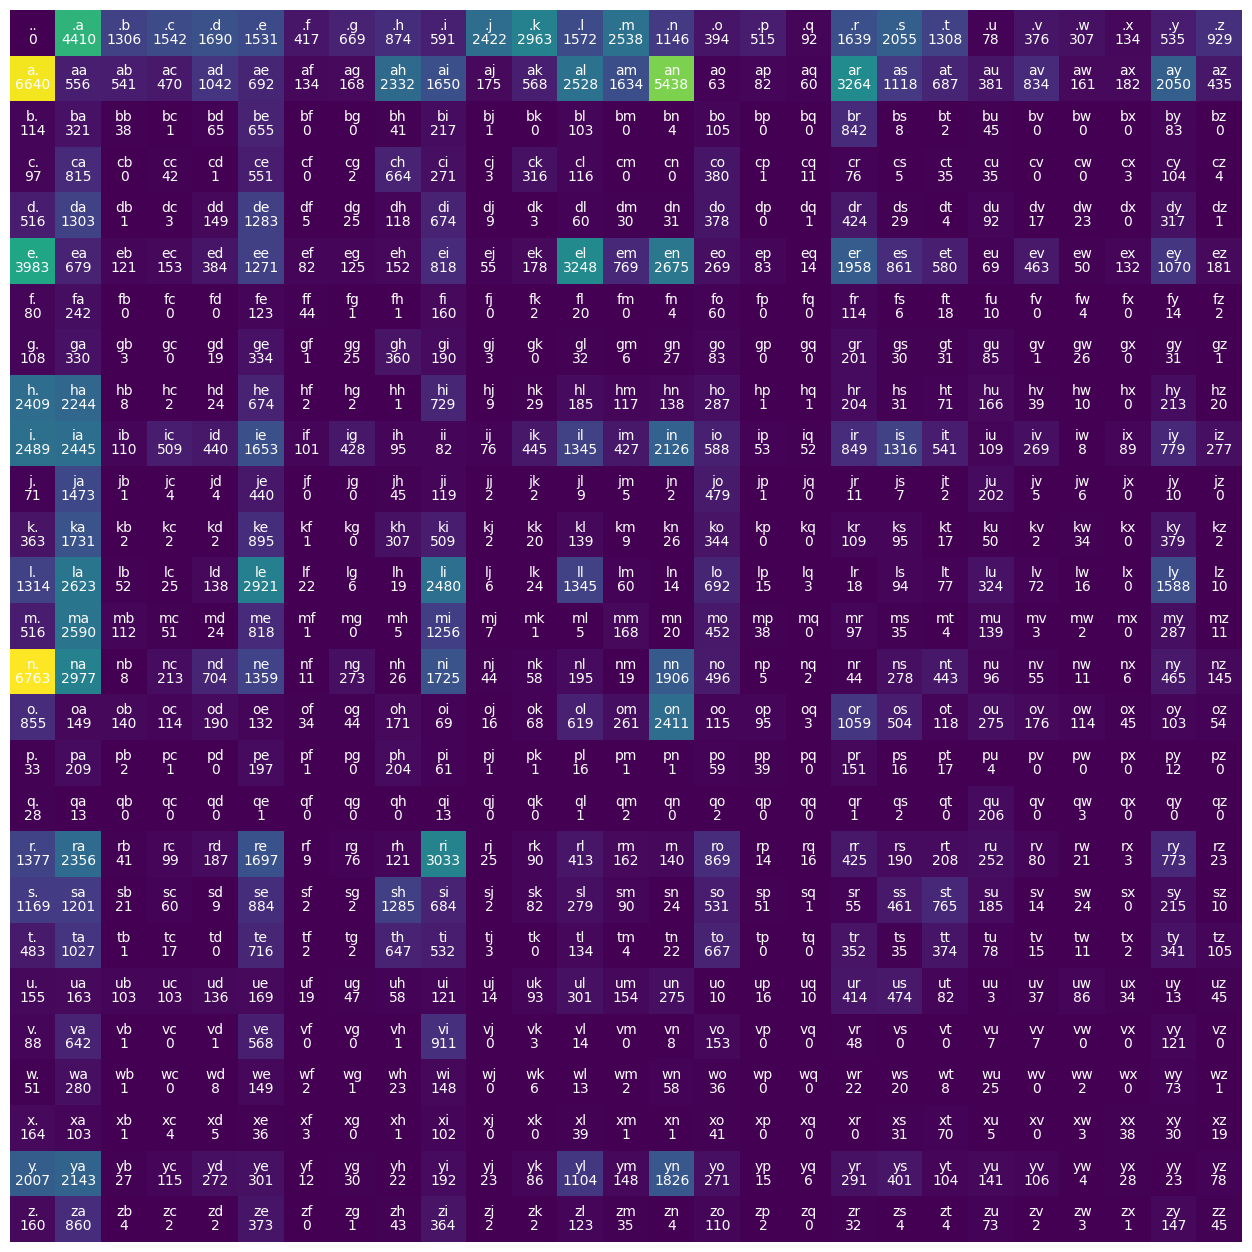

In [36]:
plt.figure(figsize=(16,16))
plt.imshow(N)

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j , i , chstr , ha="center" , va="bottom" , color="white")
        plt.text(j , i , N[i , j].item() , ha="center" , va="top" , color="white")

plt.axis("off")
plt.show()

In [66]:
torch.rand(3,1 , generator=g)

tensor([[0.0290],
        [0.4019],
        [0.2598]])

In [104]:
p = N[0].float()
p = p / p.sum()
p
g = torch.Generator().manual_seed(1234)
torch.multinomial(p , num_samples=1 , replacement=True , generator=g)

tensor([11])

In [117]:
N = N.float() / N.sum(1 , keepdim=True).float()

In [135]:
g = torch.Generator().manual_seed(1234)

def randomWord(num_of_words):
    idx = 0
    
    word_len = torch.randint(min(len(c) for c in words) , max(len(c) for c in words) , (1,)).item()
    
    for _ in range(num_of_words):
        while True:
            p = N[idx]        
            idx = torch.multinomial(p , num_samples=1 , replacement=True , generator=g).item()
            
            if idx == 0:
                break
            
            print(itos[idx] , end='')
        print()        
randomWord(10)

k
melyn
dahileiebrverar
ynakhoyin
treureleovo
lis
byuma
c
thegh
ysady


### 2. **Using Neural Network with Single layer**

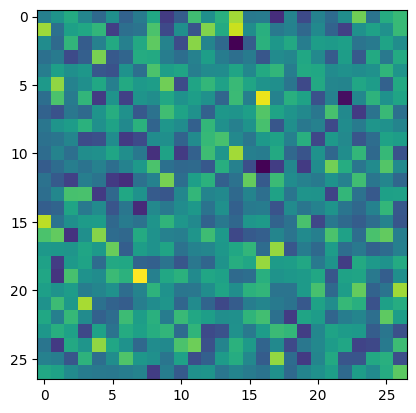

In [58]:
g = torch.Generator(device=device).manual_seed(1452132)
W = torch.randn((27 , 27) , generator=g , requires_grad=True , device=device)

plt.imshow(W.detach().cpu())

In [76]:
batch_size = 8

num_of_batches = int(len(words) / batch_size)

for i in range(num_of_batches):
    input_words = words[i*batch_size : min((i+1)*batch_size , len(words)) ]
    
    x = []
    y = []
    
    for word in words:
        chstr = ['.'] + list(word) + ['.']
        
        for ch1 , ch2 in zip(chstr , chstr[1:]):
            idx1 = stoi[ch1]
            idx2 = stoi[ch2]
            
            x.append(idx1)
            y.append(idx2)
            
    x_in = torch.tensor(x , device=device)
    x_in = torch.nn.functional.one_hot(x_in , num_classes=27).type(torch.float32)
    
    # Forward Pass
    logits = x_in @ W
    counts = logits.exp()
    probs = counts / counts.sum(1 , keepdim=True)
    loss = -probs[torch.arange(x_in.shape[0]) , y].log().mean()
    
    # Backward Pass
    W.grad = None
    loss.backward()
    
    # Update
    W.data += -0.5 * W.grad
    
    if i % 10 == 0:
        print(f"Loss : {loss}")

Loss : 2.72189998626709
Loss : 2.7188971042633057
Loss : 2.715958595275879
Loss : 2.7130825519561768
Loss : 2.7102673053741455
Loss : 2.707510232925415
Loss : 2.7048099040985107
Loss : 2.702165126800537
Loss : 2.699573040008545
Loss : 2.697033166885376
Loss : 2.6945433616638184
Loss : 2.69210147857666
Loss : 2.6897075176239014
Loss : 2.68735933303833
Loss : 2.6850547790527344
Loss : 2.6827940940856934
Loss : 2.680575132369995
Loss : 2.678396701812744
Loss : 2.6762583255767822
Loss : 2.6741583347320557
Loss : 2.672095537185669
Loss : 2.6700689792633057
Loss : 2.6680784225463867
Loss : 2.6661217212677
Loss : 2.664198637008667
Loss : 2.662308692932129
Loss : 2.6604504585266113
Loss : 2.658623218536377
Loss : 2.6568262577056885
Loss : 2.6550586223602295
Loss : 2.6533203125
Loss : 2.6516096591949463
Loss : 2.6499266624450684
Loss : 2.64827036857605
Loss : 2.6466400623321533
Loss : 2.6450355052948
Loss : 2.643455982208252
Loss : 2.6419005393981934
Loss : 2.640369176864624
Loss : 2.6388607025

In [42]:
(f"{-probs[torch.arange(x_in.shape[0]) , y].log().mean().item():.5f}")

'3.72038'

In [75]:
g = torch.Generator(device=device).manual_seed(1234)

def randomWord(num_of_words):
    idx = 0
        
    for _ in range(num_of_words):
        while True:
            
            x_in = torch.tensor([idx] , device=device)
            x_in = torch.nn.functional.one_hot(x_in , num_classes=27).type(torch.float32)
                
            # Forward Pass
            logits = x_in @ W
            counts = logits.exp()
            probs = counts / counts.sum(1 , keepdim=True)
            
            idx = torch.multinomial(probs , num_samples=1 , replacement=True , generator=g).item()
            
            if idx == 0:
                break
            
            print(itos[idx] , end='')
        print()        
randomWord(10)

eromer
ledhasgjygjli
hlzdhaneypxqwyn
drsfkh
xkaosttzyli
kn
roispliuzmarqe
ytsmryfrikutzrmake
xmenelkxos
mbrbo
